# SuperheroU Facebook Ad Campaign Analysis Report

**Prepared for:** GlobalShala Marketing Team
**Prepared by:** Charan Teja  
**Role:** Data Analyst Intern
**Date:** June 2025

---

## Project Objective

This report presents a full analysis of Facebook ad campaigns run for the **SuperheroU Event**. Using advanced data analytics and visualization techniques in Python, we aim to:

- Identify **which campaigns performed best**
- Detect **cost-inefficient campaigns**
- Recommend **which campaigns to continue or discontinue**

---

## Tools & Technologies

- Python (Pandas, Seaborn, Matplotlib)
- Jupyter Notebook
- Data Visualization & KPI Analysis

---

## Contents

1. **Section 1:** Data Loading & Cleaning  
2. **Section 2:** Exploratory Data Analysis (EDA)  
3. **Section 3:** KPI-Based Visual Analysis (CTR, CPC, CPR)  
4. **Section 4:** Campaign Ranking & Recommendation  
5. **Section 5:** Final Executive Summary  

---



# Section 1: Data Loading & Cleaning

In this section, we:
- Load the Facebook ad campaign dataset
- Inspect the structure and contents
- Drop irrelevant columns
- Check for missing values
- Confirm correct data types

In [11]:
# Import libraries
import pandas as pd
import numpy as np

# Optional for visuals later
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Load the Excel file
df = pd.read_excel("Marketing Team Data.xlsx")

# Preview the first few rows
df.head()
df.tail()

,campaign ID,Campaign Name,Audience,Age,Geography,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clicks (ULC),Click-Through Rate (CTR in %),Unique Click-Through Rate (Unique CTR in %),Amount Spent in INR,Cost Per Click (CPC),Cost per Result (CPR),@dropdown,@dropdown.1
28,Campaign 10,SHU_Students(UK),Students,18-24,UK,741,785,1.059379,39,34,20,4.968153,4.588394,255.57,6.553077,12.78,NaN,NaN
29,Campaign 10,SHU_Students(UK),Students,25-34,UK,338,365,1.079882,13,11,4,3.561644,3.254438,113.58,8.736923,28.40,NaN,NaN
30,Campaign 11,SHU_Students (USA),Students,13-17,USA,2159,2465,1.141732,126,111,95,5.111562,5.141269,691.28,5.486358,7.28,NaN,NaN
31,Campaign 11,SHU_Students (USA),Students,18-24,USA,305,332,1.088525,43,37,28,12.951807,12.131148,159.14,3.700843,5.68,NaN,NaN
32,Campaign 11,SHU_Students (USA),Students,25-34,USA,91,103,1.131868,9,8,3,8.737864,8.791209,47.26,5.251404,15.75,NaN,NaN


## Initial Cleanup

We will now:
- Drop unnecessary columns (like "@dropdown")
- Check for missing values
- Confirm data types


In [12]:
# Drop unwanted columns
df_cleaned = df.drop(columns=[col for col in df.columns if "@dropdown" in col])

# Check for missing values
print("Missing Values:")
print(df_cleaned.isnull().sum())

# Check data types
print("\nData Types:")
print(df_cleaned.dtypes)

# Show new shape
print(f"\nCleaned dataset shape: {df_cleaned.shape}")


Missing Values:
campaign ID                                    0
Campaign Name                                  0
Audience                                       0
Age                                            0
Geography                                      0
Reach                                          0
Impressions                                    0
Frequency                                      0
Clicks                                         0
Unique Clicks                                  0
Unique Link Clicks (ULC)                       0
Click-Through Rate (CTR in %)                  0
Unique Click-Through Rate (Unique CTR in %)    0
Amount Spent in INR                            0
Cost Per Click (CPC)                           0
Cost per Result (CPR)                          0
dtype: int64

Data Types:
campaign ID                                     object
Campaign Name                                   object
Audience                                        object
Age      

# Section 2: Exploratory Data Analysis (EDA)

- Campaign distribution
- Spend per campaign
- Audience and age breakdown
- Reach and Impression relationships
- CTR, Frequency, and Clicks overview


In [13]:
# Unique campaigns and audiences
print("Unique Campaigns:", df_cleaned['Campaign Name'].nunique())
print("Unique Audiences:", df_cleaned['Audience'].unique())
print("Age Groups:", df_cleaned['Age'].unique())

# Total amount spent overall
print("\nTotal Ad Spend (INR):", df_cleaned['Amount Spent in INR'].sum())


Unique Campaigns: 11
Unique Audiences: ['Educators and Principals' 'Students']
Age Groups: ['25-34' '35-44' '45-54' '55-64' '18-24' '13-17']

Total Ad Spend (INR): 12088.609999999999


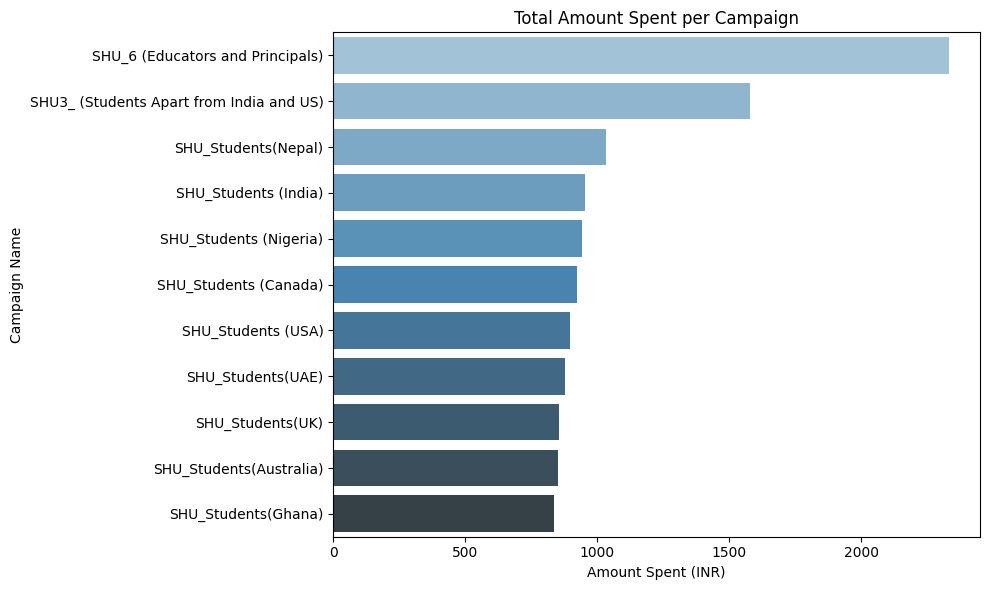

In [14]:
# Total spend per campaign
spend_by_campaign = df_cleaned.groupby('Campaign Name')['Amount Spent in INR'].sum().sort_values(ascending=False)

# Bar plot of spend
plt.figure(figsize=(10,6))
sns.barplot(x=spend_by_campaign.values, y=spend_by_campaign.index, palette='Blues_d')
plt.title("Total Amount Spent per Campaign")
plt.xlabel("Amount Spent (INR)")
plt.ylabel("Campaign Name")
plt.tight_layout()
plt.show()

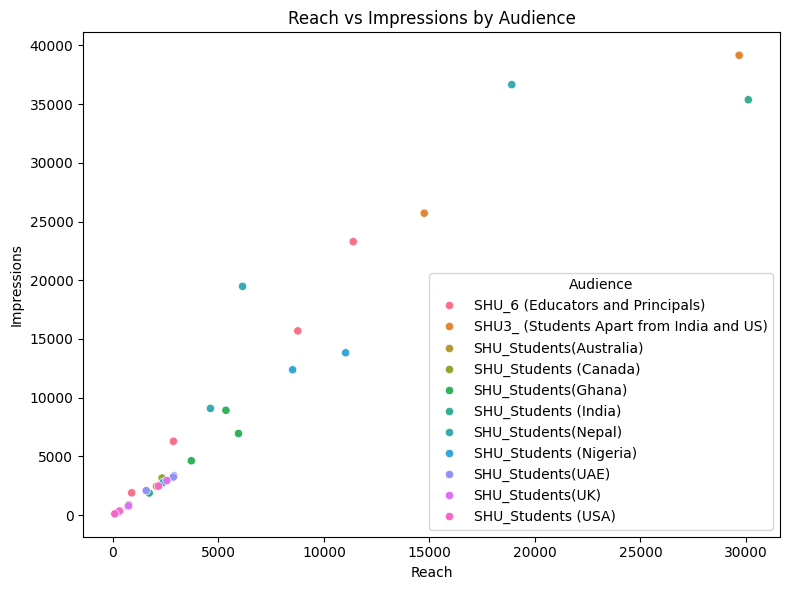

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cleaned, x='Reach', y='Impressions', hue='Campaign Name')
plt.title("Reach vs Impressions by Audience")
plt.xlabel("Reach")
plt.ylabel("Impressions")
plt.legend(title="Audience")
plt.tight_layout()
plt.show()

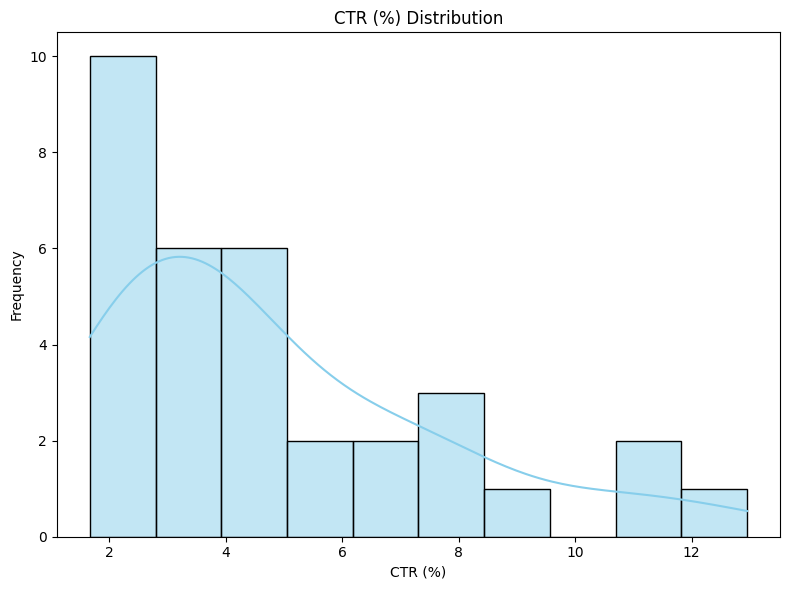

In [16]:
plt.figure(figsize=(8,6))
sns.histplot(df_cleaned['Click-Through Rate (CTR in %)'], kde=True, bins=10, color='skyblue')
plt.title("CTR (%) Distribution")
plt.xlabel("CTR (%)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

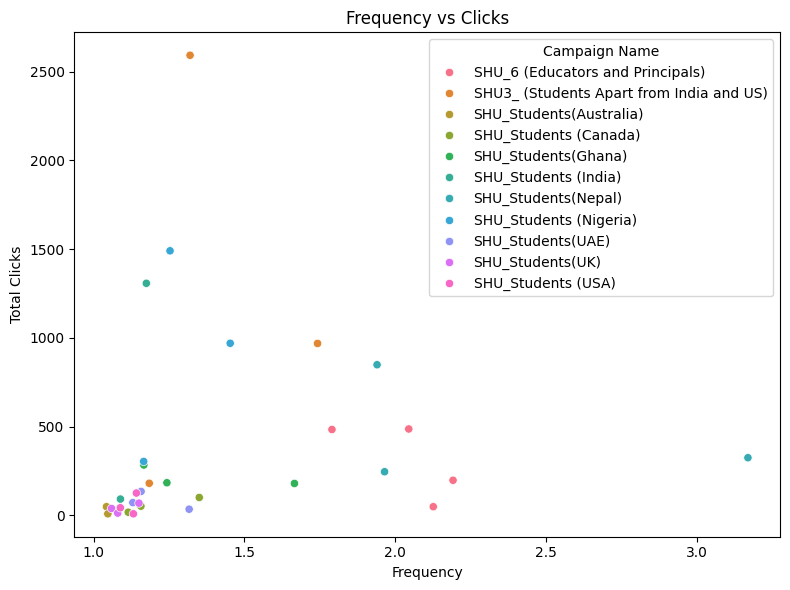

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cleaned, x='Frequency', y='Clicks', hue='Campaign Name')
plt.title("Frequency vs Clicks")
plt.xlabel("Frequency")
plt.ylabel("Total Clicks")
plt.tight_layout()
plt.show()

#  Section 3: KPI-Based Visual Analysis

Visualized these KPIs to compare campaigns and find underperformers.

- CTR (Click-Through Rate)
- CPC (Cost Per Click)
- CPR (Cost Per Result)




In [18]:
# Grouping by Campaign for KPI averages
kpi_df = df_cleaned.groupby("Campaign Name")[
    ["Click-Through Rate (CTR in %)", "Cost Per Click (CPC)", "Cost per Result (CPR)"]
].mean().sort_values("Click-Through Rate (CTR in %)", ascending=False)

# Display the top few rows
kpi_df.head()

,Click-Through Rate (CTR in %),Cost Per Click (CPC),Cost per Result (CPR)
Campaign Name,,,
SHU_Students (Nigeria),9.852129,0.347575,0.896667
SHU_Students (USA),8.933744,4.812868,9.570000
SHU3_ (Students Apart from India and US),5.929297,0.414103,1.033333
SHU_Students (Canada),5.513462,5.504242,7.930000
SHU_Students(Australia),4.353869,7.921484,23.106667


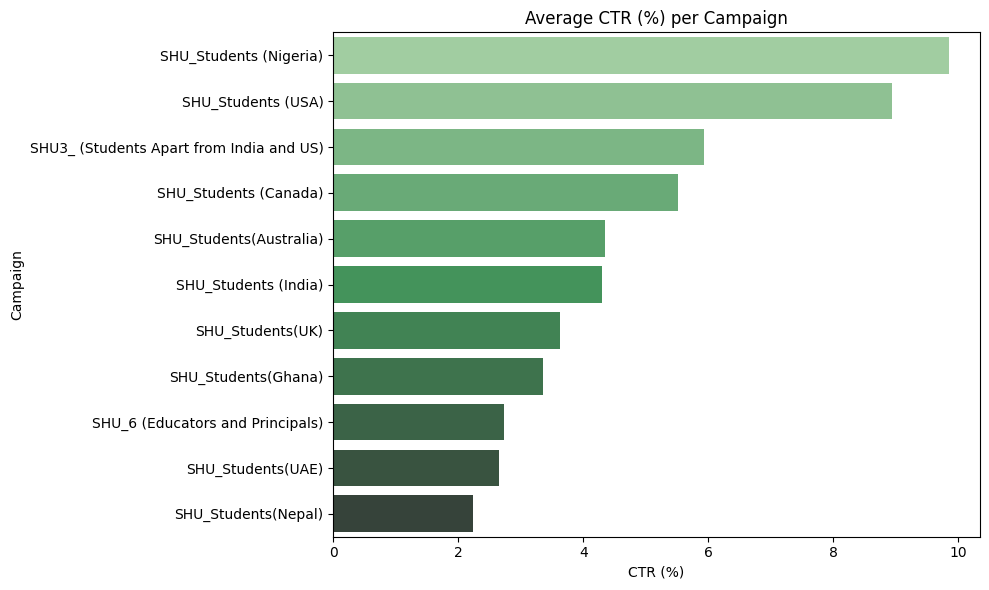

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(y=kpi_df.index, x=kpi_df["Click-Through Rate (CTR in %)"], palette="Greens_d")
plt.title("Average CTR (%) per Campaign")
plt.xlabel("CTR (%)")
plt.ylabel("Campaign")
plt.tight_layout()
plt.show()

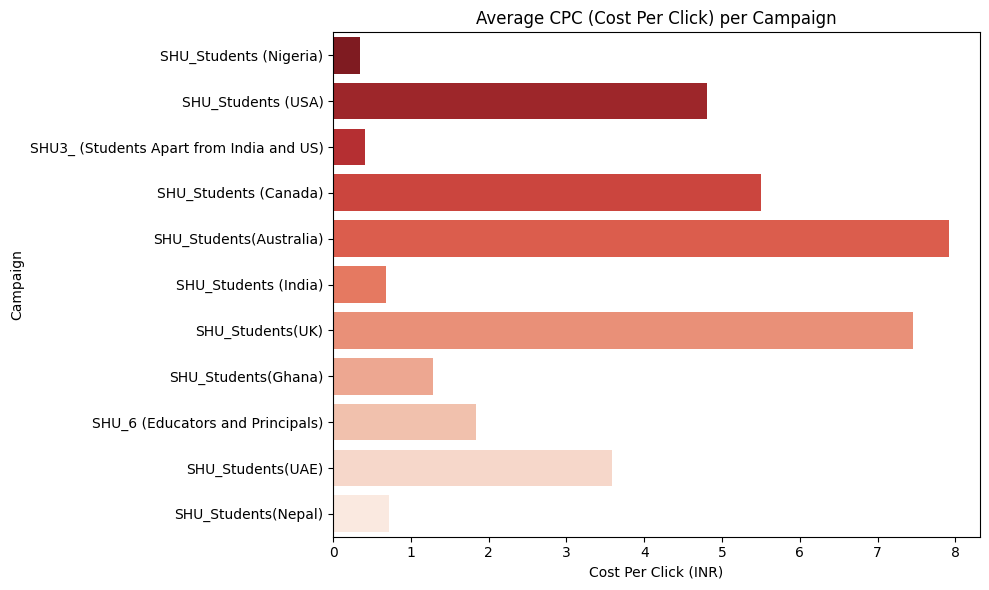

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(y=kpi_df.index, x=kpi_df["Cost Per Click (CPC)"], palette="Reds_r")
plt.title("Average CPC (Cost Per Click) per Campaign")
plt.xlabel("Cost Per Click (INR)")
plt.ylabel("Campaign")
plt.tight_layout()
plt.show()

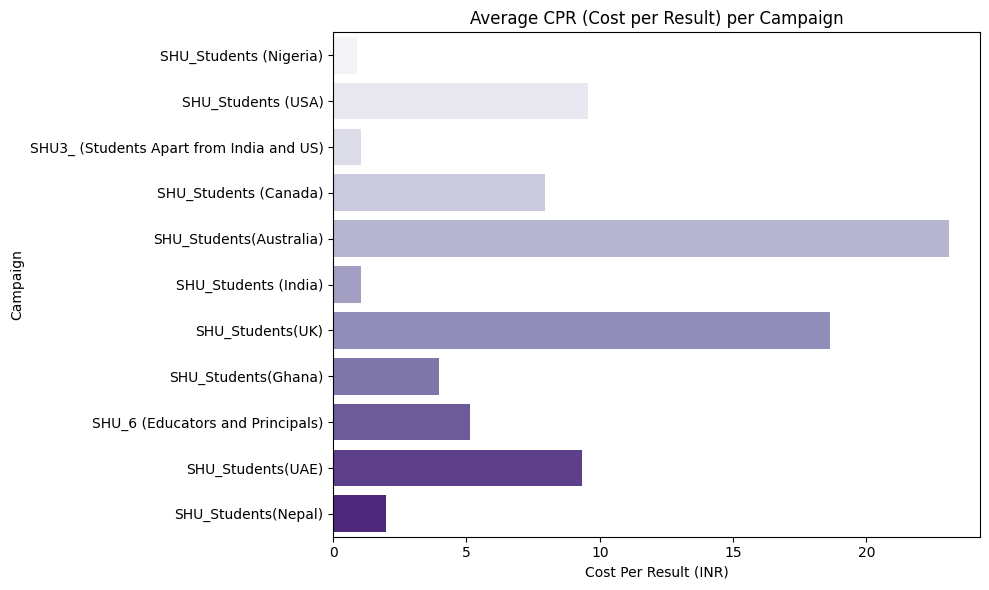

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(y=kpi_df.index, x=kpi_df["Cost per Result (CPR)"], palette="Purples")
plt.title("Average CPR (Cost per Result) per Campaign")
plt.xlabel("Cost Per Result (INR)")
plt.ylabel("Campaign")
plt.tight_layout()
plt.show()

# Section 4: Campaign Ranking & Recommendation

In this final step, we:
- Score each campaign based on efficiency
- Combine CTR, CPC, and CPR using normalization
- Rank all campaigns
- Recommend which campaigns to keep or discontinue


In [24]:
from sklearn.preprocessing import MinMaxScaler

# Create inverse CPC and CPR (lower = better)
ranking_df = kpi_df.copy()
ranking_df['CPC_inv'] = ranking_df['Cost Per Click (CPC)'].max() - ranking_df['Cost Per Click (CPC)']
ranking_df['CPR_inv'] = ranking_df['Cost per Result (CPR)'].max() - ranking_df['Cost per Result (CPR)']

# Normalize values between 0 and 1
scaler = MinMaxScaler()
ranking_df[['CTR_scaled', 'CPC_scaled', 'CPR_scaled']] = scaler.fit_transform(
    ranking_df[['Click-Through Rate (CTR in %)', 'CPC_inv', 'CPR_inv']]
)

# Calculate Efficiency Score (equal weights)
ranking_df['Efficiency Score'] = ranking_df[['CTR_scaled', 'CPC_scaled', 'CPR_scaled']].mean(axis=1)

# Sort campaigns by score
final_ranking = ranking_df.sort_values(by='Efficiency Score', ascending=False)

# Show top campaigns
final_ranking[['Click-Through Rate (CTR in %)', 'Cost Per Click (CPC)',
               'Cost per Result (CPR)', 'Efficiency Score']]


,Click-Through Rate (CTR in %),Cost Per Click (CPC),Cost per Result (CPR),Efficiency Score
Campaign Name,,,,
SHU_Students (Nigeria),9.852129,0.347575,0.896667,1.000000
SHU3_ (Students Apart from India and US),5.929297,0.414103,1.033333,0.823440
SHU_Students (India),4.303563,0.674431,1.055000,0.740550
SHU_Students(Nepal),2.231162,0.722243,1.996667,0.633668
SHU_Students (USA),8.933744,4.812868,9.570000,0.633138
SHU_Students(Ghana),3.363691,1.283675,3.970000,0.628879
SHU_6 (Educators and Principals),2.730438,1.835527,5.130000,0.559484
SHU_Students (Canada),5.513462,5.504242,7.930000,0.477724
SHU_Students(UAE),2.647770,3.584753,9.350000,0.415548


from matplotlib import pyplot as plt
_df_0['Click-Through Rate (CTR in %)'].plot(kind='hist', bins=20, title='Click-Through Rate (CTR in %)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Cost Per Click (CPC)'].plot(kind='hist', bins=20, title='Cost Per Click (CPC)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Cost per Result (CPR)'].plot(kind='hist', bins=20, title='Cost per Result (CPR)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Efficiency Score'].plot(kind='hist', bins=20, title='Efficiency Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Click-Through Rate (CTR in %)', y='Cost Per Click (CPC)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Cost Per Click (CPC)', y='Cost per Result (CPR)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Cost per Result (CPR)', y='Efficiency Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Click-Through Rate (CTR in %)'].plot(kind='line', figsize=(8, 4), title='Click-Through Rate (CTR in %)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Cost Per Click (CPC)'].plot(kind='line', figsize=(8, 4), title='Cost Per Click (CPC)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Cost per Result (CPR)'].plot(kind='line', figsize=(8, 4), title='Cost per Result (CPR)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Efficiency Score'].plot(kind='line', figsize=(8, 4), title='Efficiency Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Click-Through Rate (CTR in %)'].plot(kind='hist', bins=20, title='Click-Through Rate (CTR in %)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Cost Per Click (CPC)'].plot(kind='hist', bins=20, title='Cost Per Click (CPC)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Cost per Result (CPR)'].plot(kind='hist', bins=20, title='Cost per Result (CPR)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Efficiency Score'].plot(kind='hist', bins=20, title='Efficiency Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='Click-Through Rate (CTR in %)', y='Cost Per Click (CPC)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Cost Per Click (CPC)', y='Cost per Result (CPR)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Cost per Result (CPR)', y='Efficiency Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Click-Through Rate (CTR in %)'].plot(kind='line', figsize=(8, 4), title='Click-Through Rate (CTR in %)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Cost Per Click (CPC)'].plot(kind='line', figsize=(8, 4), title='Cost Per Click (CPC)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Cost per Result (CPR)'].plot(kind='line', figsize=(8, 4), title='Cost per Result (CPR)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Efficiency Score'].plot(kind='line', figsize=(8, 4), title='Efficiency Score')
plt.gca().spines[['top', 'right']].set_visible(False)

# Final Recommendations Summary

After analyzing CTR, CPC, and CPR across campaigns:

**Recommended to Keep (High Efficiency):**
- SHU_Students (Nigeria)
- SHU3_ (Apart from India & US)
- SHU_Students (India)

**Consider Dropping (Low Efficiency & High Cost):**
- SHU_Students (Australia)
- SHU_Students (UK)
- SHU_Students (Canada)

This ensures GlobalShala focuses budget on high-performing campaigns and minimizes waste.
